<a href="https://colab.research.google.com/github/briron/ML_textbook/blob/master/Textbook_Part_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 누락된 데이터 제거

In [24]:
import pandas as pd
from io import StringIO

csv_data = \
'''A,B,C,D
1.0,2.0,3.0,4.0
5.0,6.0,,8.0
10.0,11.0,12.0,'''

df = pd.read_csv(StringIO(csv_data))
df
#df.values

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [25]:
df.isnull()
df.isnull().sum(axis=1)

0    0
1    1
2    1
dtype: int64

In [26]:
df.dropna(axis=1)

,A,B
0,1.0,2.0
1,5.0,6.0
2,10.0,11.0


In [27]:
df.dropna(thresh=4)

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [28]:
df.dropna(subset=['C'])

,A,B,C,D
0,1.0,2.0,3.0,4.0
2,10.0,11.0,12.0,NaN


#누락된 값 대체

In [29]:
import numpy as np
from sklearn.impute import SimpleImputer
simr = SimpleImputer(missing_values=np.nan, strategy='mean')
imputed_data = simr.fit_transform(df.values)
imputed_data

array([[ 1. ,  2. ,  3. ,  4. ],
       [ 5. ,  6. ,  7.5,  8. ],
       [10. , 11. , 12. ,  6. ]])

In [30]:
from sklearn.preprocessing import FunctionTransformer
ftr_simr = FunctionTransformer(lambda X : simr.fit_transform(X.T).T, validate=False)
imputed_data = ftr_simr.fit_transform(df.values)
imputed_data

array([[ 1.        ,  2.        ,  3.        ,  4.        ],
       [ 5.        ,  6.        ,  6.33333333,  8.        ],
       [10.        , 11.        , 12.        , 11.        ]])

#범주형 데이터 다루기

In [31]:
import pandas as pd
df = pd.DataFrame([
                   ['green','M',10.1,'class1'],
                   ['red','L', 13.5, 'class2'],
                   ['blue','XL',15.3,'class1'] ])
df.columns = ['color', 'size', 'price', 'classlabel']
df

,color,size,price,classlabel
0,green,M,10.1,class1
1,red,L,13.5,class2
2,blue,XL,15.3,class1


In [32]:
size_mapping = {'XL' : 2, 'L' : 1, 'M' : 0}
df['size'] = df['size'].map(size_mapping)
df

,color,size,price,classlabel
0,green,0,10.1,class1
1,red,1,13.5,class2
2,blue,2,15.3,class1


In [33]:
inv_size_mapping = {v: k for k, v in size_mapping.items()}
df['size'].map(inv_size_mapping)

0     M
1     L
2    XL
Name: size, dtype: object

In [34]:
import numpy as np
class_mapping = {label : idx for idx, label in enumerate(np.unique(df['classlabel']))}
class_mapping

{'class1': 0, 'class2': 1}

In [35]:
df['classlabel'] = df['classlabel'].map(class_mapping)
df

,color,size,price,classlabel
0,green,0,10.1,0
1,red,1,13.5,1
2,blue,2,15.3,0


In [36]:
inv_class_mapping = {v: k for k, v in class_mapping.items()}
df['classlabel'] = df['classlabel'].map(inv_class_mapping)
df

,color,size,price,classlabel
0,green,0,10.1,class1
1,red,1,13.5,class2
2,blue,2,15.3,class1


In [37]:
from sklearn.preprocessing import LabelEncoder
class_le = LabelEncoder()
y = class_le.fit_transform(df['classlabel'].values)
y
class_le.inverse_transform(y)

array(['class1', 'class2', 'class1'], dtype=object)

In [38]:
X = df[['color', 'size', 'price']].values

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
oh_enc = OneHotEncoder(categories='auto')
col_trans = ColumnTransformer([('oh_enc', oh_enc, [0])], remainder='passthrough')
col_trans.fit_transform(X)

array([[0.0, 1.0, 0.0, 0, 10.1],
       [0.0, 0.0, 1.0, 1, 13.5],
       [1.0, 0.0, 0.0, 2, 15.3]], dtype=object)

In [39]:
pd.get_dummies(df[['price', 'color', 'size']], drop_first=True)

,price,size,color_green,color_red
0,10.1,0,1,0
1,13.5,1,0,1
2,15.3,2,0,0


#데이터셋 나누기

In [40]:
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)
np.unique(df_wine[0])

array([1, 2, 3])

In [41]:
df_wine.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [42]:
from sklearn.model_selection import train_test_split
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

#특성 스케일 맞추기

In [43]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)

In [44]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

#유용한 특성선택

In [45]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='liblinear', multi_class='auto', penalty='l1', C=1.0, random_state=42)
lr.fit(X_train_std, y_train)
print(lr.score(X_train_std, y_train))
print(lr.score(X_test_std, y_test))

1.0
1.0


In [46]:
lr.coef_

array([[ 1.24579421,  0.18061164,  0.74359352, -1.16112462,  0.        ,
         0.        ,  1.16957619,  0.        ,  0.        ,  0.        ,
         0.        ,  0.54788874,  2.51037422],
       [-1.53699942, -0.38746609, -0.99525191,  0.36498543, -0.05970899,
         0.        ,  0.6678873 ,  0.        ,  0.        , -1.93417045,
         1.23366592,  0.        , -2.23177895],
       [ 0.13562632,  0.16843221,  0.3572171 ,  0.        ,  0.        ,
         0.        , -2.43829335,  0.        ,  0.        ,  1.56374546,
        -0.81900707, -0.49232727,  0.        ]])

#랜덤 포레스트의 특성 중요도 사용

 1) 13                             0.185453
 2) 7                              0.174751
 3) 10                             0.143920
 4) 12                             0.136162
 5) 1                              0.118529
 6) 11                             0.058739
 7) 6                              0.050872
 8) 5                              0.031357
 9) 2                              0.025648
10) 9                              0.025570
11) 4                              0.022366
12) 8                              0.013354
13) 3                              0.013279


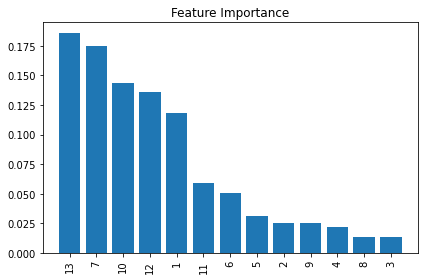

In [50]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
feat_labels = df_wine.columns[1:]
forest = RandomForestClassifier(n_estimators=500, random_state=1)
forest.fit(X_train, y_train)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(X_train.shape[1]):
  print("%2d) %-*s %f" % (f+1, 30, feat_labels[indices[f]], importances[indices[f]]))
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()